In [1]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

In [8]:
%%capture
%%R
library(ape)
library(ade4)
library(adephylo)
library(treeio)
library(ggtree)
library(phylogram)
library(phytools)
library(data.tree)
library(tidytree)
library(dplyr)
library(paco)
library(ggplot2)
library(seqinr)
library(castor)

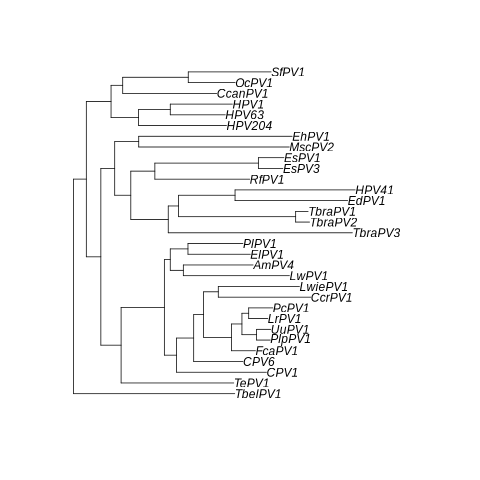

In [12]:
%%R
# load subtrees generated in 'Figure1.R'
pv = read.tree('../data/King-2021/shared_data/subtree_full.tree')
plot (pv)

Rotating nodes to optimize matching...
Done.
png 
  2 


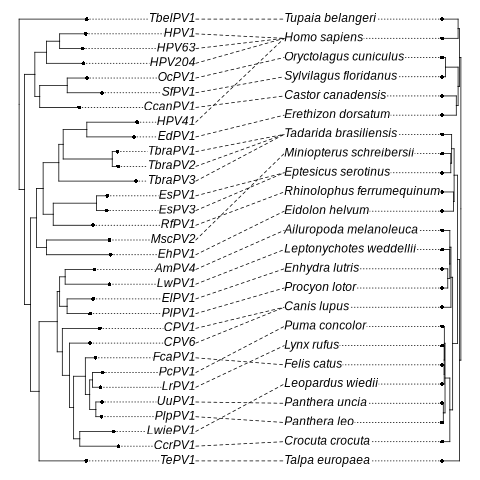

In [15]:
%%R
# load host trees created using TimeTree.org
host = read.tree('../data/King-2021/F2/th2.tree')

# load virus-host association .csv files 

HP = read.csv('../data/King-2021/F2/HP-list.csv', header=FALSE)
HP
cophy = cophylo(pv, host, assoc=HP, rotate = T)
tangle = plot(cophy)

plot(cophy)


pdf('tanglegram.pdf')
plot(cophy)
dev.off()

In [19]:
%%R
HP1 = read.csv('../data/King-2021/F2/HP-pruned.csv', row.names = 1)
HP2 = read.csv('../data/King-2021/F2/HP-full.csv', row.names = 1)

host1 = read.tree('../data/King-2021/F2/th1.tree')
host2 = read.tree('../data/King-2021/F2/th2.tree')
pv1 = read.tree('../data/King-2021/shared_data/subtree_pruned.tree')
pv2 = read.tree('../data/King-2021/shared_data/subtree_full.tree')



dist1 = tree_distance(pv1, host1, metric='WassersteinLaplacianSpectrum', normalize=TRUE, NLeigenvalues = 0)
dist2 = tree_distance(pv2, host2, metric='WassersteinLaplacianSpectrum', normalize=TRUE, NLeigenvalues = 0)
dist2

[1] 0.2046986
